<a href="https://colab.research.google.com/github/THODESAIPRAJWAL/stockmarket-prediction/blob/main/Long_Short_Term_Memory_on_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 15.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
aapl = yf.Ticker("aapl")


In [ ]:
aapl.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


In [ ]:
df=aapl.history(start='2001-01-19', end='2023-02-19', actions=False)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,0.295421,0.297321,0.284022,0.296371,776664000
2001-01-22 00:00:00-05:00,0.289722,0.298271,0.280223,0.292572,519327200
2001-01-23 00:00:00-05:00,0.293522,0.318220,0.289723,0.311570,879530400
2001-01-24 00:00:00-05:00,0.313470,0.314420,0.297321,0.311570,717091200
2001-01-25 00:00:00-05:00,0.312520,0.312520,0.300172,0.303021,489708800
...,...,...,...,...,...
2023-02-13 00:00:00-05:00,150.949997,154.259995,150.919998,153.850006,62199000
2023-02-14 00:00:00-05:00,152.119995,153.770004,150.860001,153.199997,61707600
2023-02-15 00:00:00-05:00,153.110001,155.500000,152.880005,155.330002,65573800


In [ ]:
df.index

DatetimeIndex(['2001-01-19 00:00:00-05:00', '2001-01-22 00:00:00-05:00',
               '2001-01-23 00:00:00-05:00', '2001-01-24 00:00:00-05:00',
               '2001-01-25 00:00:00-05:00', '2001-01-26 00:00:00-05:00',
               '2001-01-29 00:00:00-05:00', '2001-01-30 00:00:00-05:00',
               '2001-01-31 00:00:00-05:00', '2001-02-01 00:00:00-05:00',
               ...
               '2023-02-06 00:00:00-05:00', '2023-02-07 00:00:00-05:00',
               '2023-02-08 00:00:00-05:00', '2023-02-09 00:00:00-05:00',
               '2023-02-10 00:00:00-05:00', '2023-02-13 00:00:00-05:00',
               '2023-02-14 00:00:00-05:00', '2023-02-15 00:00:00-05:00',
               '2023-02-16 00:00:00-05:00', '2023-02-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5556, freq=None)

In [ ]:
df.shape

(5556, 5)

In [ ]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [ ]:
df.head()

,Close
Date,
2001-01-19 00:00:00-05:00,0.296371
2001-01-22 00:00:00-05:00,0.292572
2001-01-23 00:00:00-05:00,0.311570
2001-01-24 00:00:00-05:00,0.311570
2001-01-25 00:00:00-05:00,0.303021


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

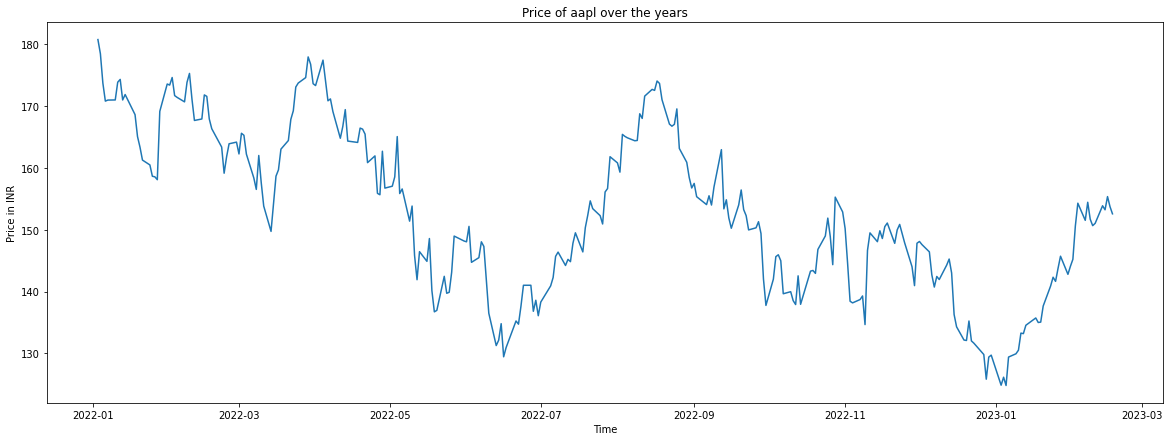

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Price of aapl over the years")
plt.plot(df['2022-01-1':'2023-02-21'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

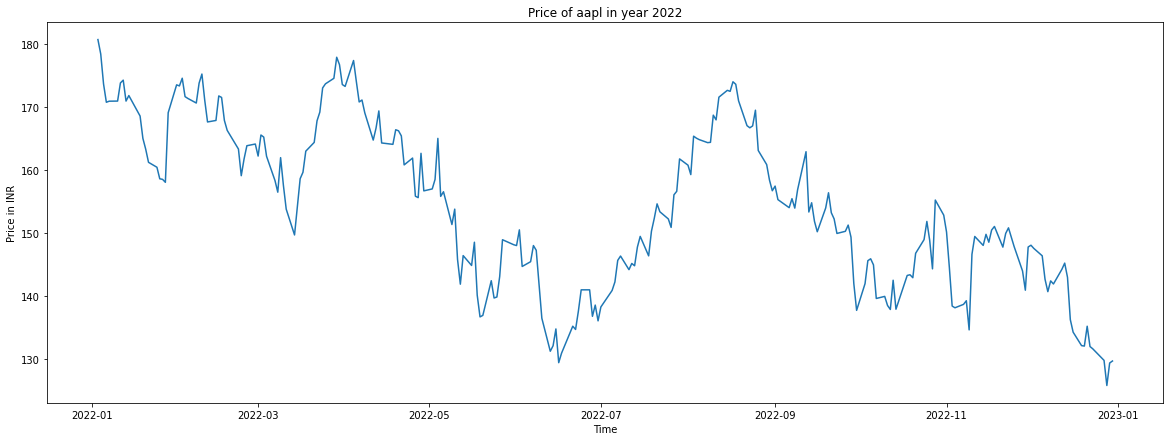

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Price of aapl in year 2022")
plt.plot(df['2022-01-01':'2023-01-01'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [ ]:
data=df.values

In [ ]:
data

array([[  0.29637134],
       [  0.29257193],
       [  0.31156987],
       ...,
       [155.33000183],
       [153.71000671],
       [152.55000305]])

In [ ]:
len(data)

5556

In [ ]:
import math

In [ ]:
train_len=math.ceil(len(data)*0.92)

In [ ]:
train_len

5112

In [ ]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data=min_max_scalar.fit_transform(data)

In [ ]:
len(scaled_data)

5556

In [ ]:
scaled_data

array([[5.37255441e-04],
       [5.16204272e-04],
       [6.21465072e-04],
       ...,
       [8.59523346e-01],
       [8.50547531e-01],
       [8.44120364e-01]])

In [ ]:
train_data=scaled_data[0:train_len,:]

In [ ]:
len(train_data)

5112

In [ ]:
len(train_data)

5112

In [ ]:
interval=60

In [ ]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train

[array([0.00053726, 0.0005162 , 0.00062147, 0.00062147, 0.0005741 ,
        0.00054252, 0.00072147, 0.00072673, 0.0007162 , 0.0006741 ,
        0.00063199, 0.00059515, 0.0006741 , 0.00064252, 0.00064252,
        0.00050568, 0.00055305, 0.00050568, 0.00053726, 0.00058463,
        0.00049515, 0.00043726, 0.00048463, 0.00047936, 0.00047936,
        0.00053726, 0.00052673, 0.00043199, 0.0004741 , 0.0005162 ,
        0.00061094, 0.00070568, 0.00068462, 0.00064778, 0.00060041,
        0.00046357, 0.00054252, 0.0006162 , 0.00055305, 0.00054778,
        0.00062673, 0.00055305, 0.00058989, 0.0007162 , 0.00083199,
        0.00072926, 0.00082104, 0.0007621 , 0.00079241, 0.00075368,
        0.00071326, 0.00059957, 0.00053726, 0.00065263, 0.00062905,
        0.00062484, 0.00075115, 0.00073094, 0.00078315, 0.00070062]),
 array([0.0005162 , 0.00062147, 0.00062147, 0.0005741 , 0.00054252,
        0.00072147, 0.00072673, 0.0007162 , 0.0006741 , 0.00063199,
        0.00059515, 0.0006741 , 0.00064252, 0.

In [ ]:
y_train

[0.0006130470480492718,
 0.0008143055198500378,
 0.0010610421262800416,
 0.001003778758206519,
 0.0009372539126148796,
 0.0009187261689812987,
 0.0009768331558082097,
 0.0009743052717808801,
 0.0011014611903736912,
 0.001041674726870187,
 0.0010787267465323734,
 0.0011343013909827007,
 0.000997040045870291,
 0.0010635652217100232,
 0.000997040045870291,
 0.0009642001755093747,
 0.0009145148453002605,
 0.0008319894796061838,
 0.0008193609576566036,
 0.0008564116563264184,
 0.000847150343932348,
 0.0009246202718198591,
 0.0008783071048876487,
 0.000876623995482033,
 0.000879146430415829,
 0.0008740962765787501,
 0.0008513565487679455,
 0.0008488336184620099,
 0.0008117825895441024,
 0.0007031506167318037,
 0.0005608338338128284,
 0.0005751512445096505,
 0.0006543095657722639,
 0.0006349420012383628,
 0.0006585205592052087,
 0.0006408375901933415,
 0.0007191509717101947,
 0.00069051664568869,
 0.0005827289521259658,
 0.0006054685148127242,
 0.0006189414811359254,
 0.0005692559858027646,
 

In [ ]:
import numpy as np

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(5052, 60, 1)

In [ ]:
import tensorflow as tf
import keras#This line imports the keras library, which is a high-level neural networks API that is built on top of TensorFlow. Keras is used for building and training deep learning models, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).
from keras.preprocessing import image#This line imports the image module from the keras.preprocessing package. This module provides tools for loading, preprocessing, and augmenting images for use in deep learning models.
from keras.models import Sequential#This line imports the Sequential model from the keras.models package. Sequential is a linear stack of layers in a deep learning model, where each layer receives the output of the previous layer.
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM#This line imports several layer classes from the keras.layers package. These include Conv2D and MaxPool2D layers for building Convolutional Neural Networks (CNNs), Flatten and Dense layers for building fully connected networks, Dropout and BatchNormalization layers for regularization, and LSTM layers for building Recurrent Neural Networks (RNNs).
from keras import regularizers #This line imports the regularizers module from the keras library. This module provides functions for adding L1 and L2 regularization to the weights of a neural network, which helps prevent overfitting.
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax #This line imports several optimizer classes from the tensorflow.keras.optimizers package. Optimizers are used to train deep learning models by updating the weights of the network during backpropagation. The optimizers imported here are Adam, RMSprop, SGD, and Adamax, which are commonly used optimizers for deep learning models.

In [ ]:
model=Sequential()
#This line creates a new sequential model object.
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
#This line adds an LSTM layer to the model with 50 units and returns the full sequence of outputs. The input_shape parameter specifies the shape of the input data. x_train.shape[1] represents the number of time steps in the input sequence and 1 represents the number of features in each time step.
model.add(LSTM(units=50))
#This line adds a second LSTM layer to the model with 50 units. Since return_sequences is not specified, this layer returns only the last output in the sequence.
model.add(Dense(50))
#This line adds a fully connected layer to the model with 50 units.
model.add(Dense(1))
#This line adds a final fully connected layer to the model with a single unit. This layer will output a single prediction value for the input sequence.

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
79/79 [==============================] - 10s 70ms/step - loss: 0.0017
Epoch 2/100
79/79 [==============================] - 9s 110ms/step - loss: 8.9974e-05
Epoch 3/100
79/79 [==============================] - 7s 83ms/step - loss: 1.0736e-04
Epoch 4/100
79/79 [==============================] - 5s 60ms/step - loss: 8.9139e-05
Epoch 5/100
79/79 [==============================] - 4s 50ms/step - loss: 7.2241e-05
Epoch 6/100
79/79 [==============================] - 4s 54ms/step - loss: 8.8452e-05
Epoch 7/100
79/79 [==============================] - 5s 60ms/step - loss: 7.8558e-05
Epoch 8/100
79/79 [==============================] - 4s 53ms/step - loss: 7.5070e-05
Epoch 9/100
79/79 [==============================] - 5s 62ms/step - loss: 7.5797e-05
Epoch 10/100
79/79 [==============================] - 4s 51ms/step - loss: 5.8256e-05
Epoch 11/100
79/79 [==============================] - 4s 51ms/step - loss: 5.2772e-05
Epoch 12/100
79/79 [==============================] - 5s 60ms/ste

In [ ]:
test_data=scaled_data[train_len-interval:,:]

In [ ]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [ ]:
y_test

array([[124.98005676],
       [123.57457733],
       [123.41621399],
       [126.00943756],
       [124.14865112],
       [125.80158234],
       [125.6036377 ],
       [125.55413818],
       [124.00017548],
       [123.3370285 ],
       [123.01039124],
       [123.78242493],
       [122.2779541 ],
       [124.60394287],
       [124.61384583],
       [125.44526672],
       [125.83127594],
       [124.82169342],
       [126.04904175],
       [129.14704895],
       [128.31562805],
       [128.82043457],
       [130.44366455],
       [129.1272583 ],
       [130.94847107],
       [132.61129761],
       [132.33415222],
       [132.0471344 ],
       [131.75018311],
       [133.40312195],
       [134.93728638],
       [135.56088257],
       [135.86772156],
       [138.53022766],
       [140.56916809],
       [143.09312439],
       [141.77671814],
       [143.62762451],
       [143.02384949],
       [144.1521759 ],
       [147.62631226],
       [146.96318054],
       [144.89453125],
       [140

In [ ]:
x_test

[array([0.70990001, 0.68871278, 0.68794635, 0.68515421, 0.66128428,
        0.66276248, 0.69851255, 0.68389498, 0.66714222, 0.65657605,
        0.66363844, 0.63593628, 0.66183183, 0.65575484, 0.66659484,
        0.66150329, 0.67770851, 0.68635862, 0.6819241 , 0.65876594,
        0.65580954, 0.6744237 , 0.66977013, 0.65635704, 0.65909439,
        0.66248877, 0.66347417, 0.65531686, 0.66763506, 0.67228851,
        0.68816536, 0.68986248, 0.69911476, 0.71258266, 0.72703597,
        0.71740046, 0.73486478, 0.72172545, 0.73524802, 0.73338662,
        0.7371095 , 0.72763817, 0.72977349, 0.72123273, 0.73426266,
        0.7364526 , 0.7346459 , 0.73021134, 0.72966392, 0.71860487,
        0.72451759, 0.69884105, 0.70020976, 0.70918841, 0.71297241,
        0.6945459 , 0.6893909 , 0.67217104, 0.68423594, 0.69783637]),
 array([0.68871278, 0.68794635, 0.68515421, 0.66128428, 0.66276248,
        0.69851255, 0.68389498, 0.66714222, 0.65657605, 0.66363844,
        0.63593628, 0.66183183, 0.65575484, 0.

In [ ]:
len(y_test)

444

In [ ]:
len(x_test)

444

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

14/14 [==============================] - 1s 14ms/step


In [ ]:
predictions[0:5]

array([[126.23382 ],
       [125.265915],
       [123.71999 ],
       [123.46881 ],
       [125.92419 ]], dtype=float32)

In [ ]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

1.1758221119373768

In [ ]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

<ipython-input-52-373018d9c8b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [ ]:
train_data.head()

,Close
Date,
2001-01-19 00:00:00-05:00,0.296371
2001-01-22 00:00:00-05:00,0.292572
2001-01-23 00:00:00-05:00,0.311570
2001-01-24 00:00:00-05:00,0.311570
2001-01-25 00:00:00-05:00,0.303021


In [ ]:
valid_data.head()

,Close,predictions
Date,,
2021-05-17 00:00:00-04:00,124.980057,126.233818
2021-05-18 00:00:00-04:00,123.574577,125.265915
2021-05-19 00:00:00-04:00,123.416214,123.719994
2021-05-20 00:00:00-04:00,126.009438,123.468811
2021-05-21 00:00:00-04:00,124.148651,125.924187


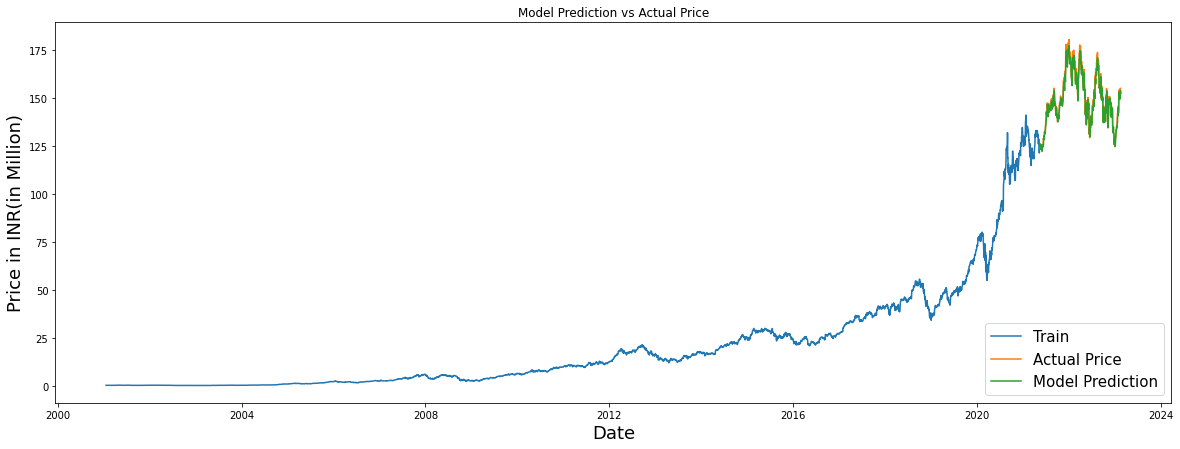

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

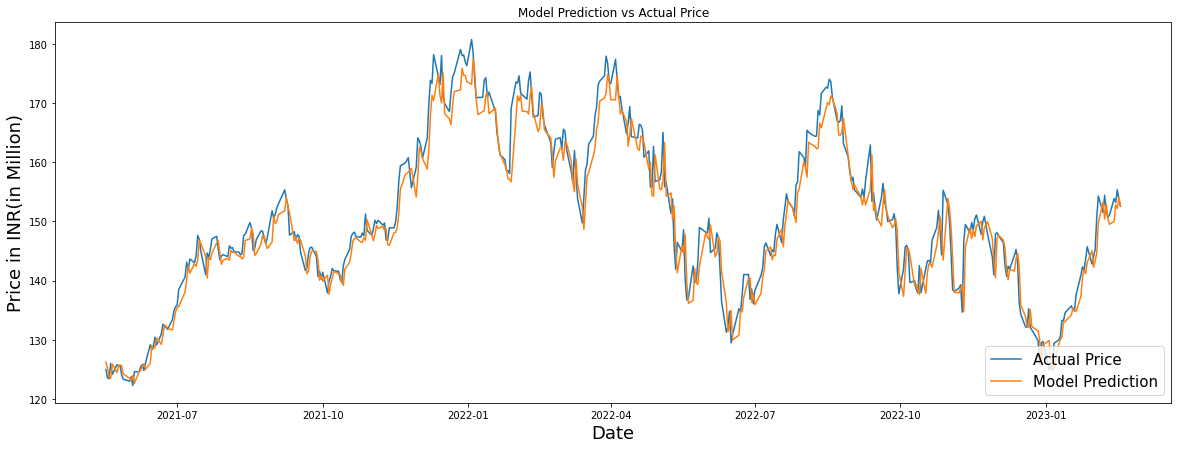

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [ ]:
valid_data.head(30)

,Close,predictions
Date,,
2021-05-17 00:00:00-04:00,124.980057,126.233818
2021-05-18 00:00:00-04:00,123.574577,125.265915
2021-05-19 00:00:00-04:00,123.416214,123.719994
2021-05-20 00:00:00-04:00,126.009438,123.468811
2021-05-21 00:00:00-04:00,124.148651,125.924187
2021-05-24 00:00:00-04:00,125.801582,124.450478
2021-05-25 00:00:00-04:00,125.603638,125.731346
2021-05-26 00:00:00-04:00,125.554138,125.734535
2021-05-27 00:00:00-04:00,124.000175,125.637932


In [ ]:
df_test=aapl.history(start='2001-01-19', end='2023-02-20', actions=False)

In [ ]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,0.295421,0.297321,0.284022,0.296371,776664000


In [ ]:
df_test.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17 00:00:00-05:00,152.350006,153.0,150.850006,152.550003,59144100


In [ ]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [ ]:
test_value=df_test[-60:].values

In [ ]:
test_value

array([[149.95103455],
       [150.83970642],
       [147.88420105],
       [144.00013733],
       [140.95478821],
       [147.80432129],
       [148.08389282],
       [147.58465576],
       [146.40646362],
       [142.69213867],
       [140.72514343],
       [142.43252563],
       [141.94328308],
       [144.26972961],
       [145.24822998],
       [142.99168396],
       [136.29190063],
       [134.30493164],
       [132.16819763],
       [132.09831238],
       [135.24349976],
       [132.02841187],
       [131.65898132],
       [129.83177185],
       [125.84785461],
       [129.41241455],
       [129.73191833],
       [124.87932587],
       [126.16736603],
       [124.82939911],
       [129.4223938 ],
       [129.95158386],
       [130.53070068],
       [133.28649902],
       [133.20661926],
       [134.55455017],
       [135.73275757],
       [135.00387573],
       [135.06378174],
       [137.6598053 ],
       [140.8948822 ],
       [142.31271362],
       [141.64373779],
       [143

In [ ]:
test_value=min_max_scalar.transform(test_value)

In [ ]:
test=[]
test.append(test_value)

In [ ]:
test

[array([[0.82972041],
        [0.83464422],
        [0.81826882],
        [0.79674861],
        [0.77987541],
        [0.81782623],
        [0.81937524],
        [0.81660914],
        [0.8100812 ],
        [0.78950145],
        [0.77860303],
        [0.78806303],
        [0.78535231],
        [0.79824232],
        [0.80366384],
        [0.79116112],
        [0.75404001],
        [0.74303093],
        [0.73119204],
        [0.73080484],
        [0.7482312 ],
        [0.73041754],
        [0.72837066],
        [0.71824674],
        [0.69617328],
        [0.71592323],
        [0.71769349],
        [0.690807  ],
        [0.69794358],
        [0.69053038],
        [0.71597852],
        [0.71891058],
        [0.72211926],
        [0.73738815],
        [0.73694557],
        [0.74441397],
        [0.750942  ],
        [0.74690353],
        [0.74723544],
        [0.76161909],
        [0.77954349],
        [0.78739919],
        [0.78369264],
        [0.79531027],
        [0.8062086 ],
        [0

In [ ]:
test=np.array(test)

In [ ]:
test

array([[[0.82972041],
        [0.83464422],
        [0.81826882],
        [0.79674861],
        [0.77987541],
        [0.81782623],
        [0.81937524],
        [0.81660914],
        [0.8100812 ],
        [0.78950145],
        [0.77860303],
        [0.78806303],
        [0.78535231],
        [0.79824232],
        [0.80366384],
        [0.79116112],
        [0.75404001],
        [0.74303093],
        [0.73119204],
        [0.73080484],
        [0.7482312 ],
        [0.73041754],
        [0.72837066],
        [0.71824674],
        [0.69617328],
        [0.71592323],
        [0.71769349],
        [0.690807  ],
        [0.69794358],
        [0.69053038],
        [0.71597852],
        [0.71891058],
        [0.72211926],
        [0.73738815],
        [0.73694557],
        [0.74441397],
        [0.750942  ],
        [0.74690353],
        [0.74723544],
        [0.76161909],
        [0.77954349],
        [0.78739919],
        [0.78369264],
        [0.79531027],
        [0.8062086 ],
        [0

In [ ]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [ ]:
tomorrow_prediction=model.predict(test)

1/1 [==============================] - 0s 25ms/step


In [ ]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [ ]:
tomorrow_prediction

array([[151.29364]], dtype=float32)

In [ ]:
model.save("msft_price_prediction.h5")
